# 四.预测模型建立

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import missingno as msno
import seaborn as sns


df = pd.read_csv('d:/dataset4/car_data_get_dummies.csv', sep=',')

In [2]:
X = df.copy(deep = True)
del X['price']
y = df['price']

In [3]:
#测试集和训练集的划分
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(272392, 316)
(68098, 316)
(272392,)
(68098,)


## 1.原标签样本

### 线性回归

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [5]:
print(model.intercept_)

10968.756016480864


In [6]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
powerPS,43.539909
kilometer,-0.058866
car_month,-21.895797
online_days,40.905847
gearbox_automatik,465.823270
...,...
brand_suzuki,-2033.881250
brand_toyota,144.613767
brand_trabant,1237.729672
brand_volkswagen,1442.381262


C:\Users\26242\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

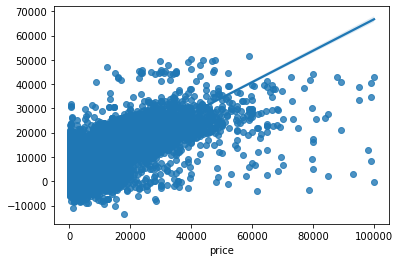

In [9]:
prediction_linear = model.predict(X_test)
sns.regplot(y_test,prediction_linear)

In [10]:
from sklearn.metrics import r2_score
r2_score(y_test,prediction_linear)

0.6491613422807985

### 随机森林

In [5]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(max_depth=5,n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train) 

RandomForestRegressor(max_depth=5, n_estimators=10, random_state=0)

In [6]:
prediction_rf=regressor.predict(X_test)

In [11]:
# Calculating r2_score
r2_score(y_test,prediction_rf)

0.7154406316512351

C:\Users\26242\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

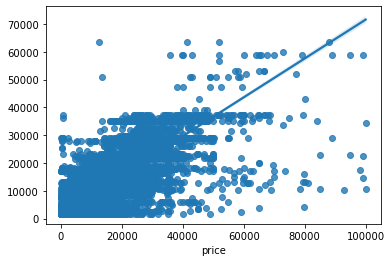

In [12]:
sns.regplot(y_test,prediction_rf)

### 决策树

In [13]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=5,random_state = 0)
regressor.fit(X_train, y_train) 

DecisionTreeRegressor(max_depth=5, random_state=0)

In [14]:
prediction_dt= regressor.predict(X_test)

In [15]:
r2_score(y_test,prediction_dt)

0.6957727673674123

C:\Users\26242\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

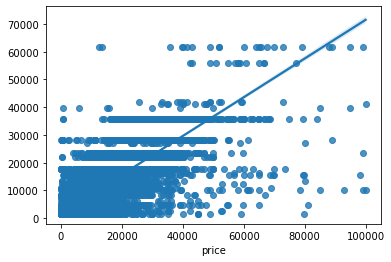

In [16]:
sns.regplot(y_test,prediction_dt)

## 2.对数变换后

In [17]:
y_train_ln = np.log(y_train + 1)
y_test_ln = np.log(y_test + 1)

### 线性回归

In [18]:
model.fit(X_train,y_train_ln)

LinearRegression()

C:\Users\26242\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

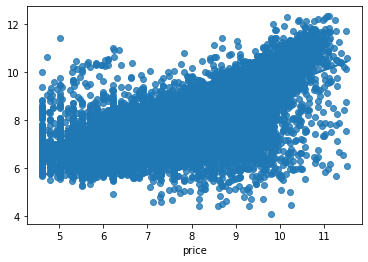

In [19]:
prediction_ln = model.predict(X_test)
sns.regplot(y_test_ln,prediction_ln)

In [20]:
r2_score(y_test_ln, prediction_ln)

0.6847152817351064

## 3.模型融合

In [21]:
import math

In [22]:
multi = (prediction_rf + prediction_dt + pd.Series(prediction_ln).apply(math.exp) - 1) / 3

In [23]:
#这个最高,即随机森林+决策树+对数变换后的线性回归

r2_score(y_test, multi)

0.7533656100086144